# Chapter 2 - Training Simple Machine Learning Algorithms for Classification

- Make use of two of the first algorithmically described machine learning algorithms for classification: the perceptron and adaptive linear neurons.

## Topics
- Building an understanding of machine learning algorithms
- Using pandas, NumPy, and Matplotlib to read in, process, and visualize data
- Implementing linear classification algorithms in Python

## The formal definition of an artificial neuron

- a binary classification task
- two classes as 1 (positive class) and –1 (negative class) for simplicity. 
- can then define a decision function (𝜙(z)) that takes a linear combination of certain input values, x, and a corresponding weight vector, w, where z is the so-called net input:
    z = w1x1 + w2𝑥2 +. . . + w(m)x(m)
	
- In the perceptron algorithm, the decision function, 𝜙(∙), is a variant of a unit step function: 

   𝜙(z) = 1 if z >= 𝜙 
       = -1 otherwise
       
#### z in a more compact form:  
$$ z = w_{0}x_{0} + ... + w_{m}x_{m} = w ^ T x $$

- the negative threshold, or weight, w0 = −𝜃, is usually called the bias unit.

## The Perceptron learning rule

- The whole idea behind the MCP neuron and Rosenblatt's thresholded perceptron model is to use a reductionist approach to mimic how a single neuron in the brain works: it either fires or it doesn't. 

Steps
1. Initialize the weights to 0 or small random numbers.
2. For each training example: $x^{(i)}$
- Compute the output value, 𝑦̂ .
- Update the weights.

The update value for $w_{j}$ (or change in $w_{j}$), which we refer to as Δ$w_{j}$ , is calculated by the perceptron learning rule as follows:
-  Δ$w_{j}$ = 𝜂($y_{i}$ − $𝑦̂_{i}$)$x_{j}^{i}$
- Where:
   - 𝜂 is the learning rate (typically a constant between 0.0 and 1.0)
   - $y_{i}$ is the true class label of the ith training example
   - and $𝑦̂_{i}$ is the predicted class label.
   
- the simultaneous update of each weight, $w_{j}$ , in the weight vector, w, can be more formally written as:
-  $w_{j} ∶= w_{j} + Δw_{j}$

For a two-dimensional dataset, we would write the update as:
- $ Δw_{0} = 𝜂(𝑦^{(i)} - output^{(i)}) $
- $ Δw_{1} = 𝜂(𝑦^{(i)} - output^{(i)})x_{1}^{(i)} $
- $ Δw_{2} = 𝜂(𝑦^{(i)} - output^{(i)})x_{2}^{(i)} $

### Examples:

Correct guesses so the weights remain unchanged, since the update values are 0 
1.   given $ y^{(i)} = -1 $ and $ \hat{y} = -1  $  
    ... then  
     $Δw_{j}$ = 𝜂( -1  -  (-1))$x_{j}^{(i)}$ = 0  
2.   given $ y^{(i)} = 1 $ and $ \hat{y} = 1  $  
    ... then  
     $Δw_{j}$ = 𝜂(1 - 1)$x_{j}^{(i)}$ = 0  
     
Incorrect guesses so the weights are being pushed postive or negative  
1.   given $ y^{(i)} = 1 $ and $ \hat{y} = -1  $  
    ... then  
     $Δw_{j}$ = 𝜂( 1  -  (-1))$x_{j}^{(i)}$ = 𝜂(2)$x_{j}^{(i)}$    
2.   given $ y^{(i)} = -1 $ and $ \hat{y} = 1  $  
    ... then  
     $Δw_{j}$ = 𝜂(-1 - 1)$x_{j}^{(i)}$ = 𝜂(-2)$x_{j}^{(i)}$


### The Multiplicative factor in depth:  

Given 
-  $ \hat{y}^{(i)} = -1 $
-  $ y^{(i)} = +1 $
-  and $ 𝜂 = 1    $   

Assuming:
-  $ x_{j}^{(i)} = 0.5 $  
-  it's misclassified as -1

This would cause  the corresponding weight to increase by 1 so that the net input
-  $ x_i^{(i)} $  
... meaning  
- the weight would be more positive the next time we encounter this example
- It wouldbe more likely to be above the threshold of the unit step function to classify the example as +1:  
- $Δw_j$ = (1 − (− 1)) 0.5 = (2)0.5 = 1

#### The weight update is proportional to the value of $x_j^{(i)}$

If $x_j^{(i)}$ = 2:  
- $ Δw_j =  (1^{(i)} − (− 1^{(i)}) 2^{(i)} = (2)2^{(i)} = 4 $  

#### the convergence of the perceptron is only guaranteed if the two classes are linearly separable and the learning rate is sufficiently small
i.e. you can draw a straight line between the 2 sets on a graph

### Perceptron overview
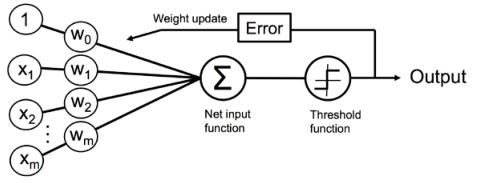

## Create a Perceptron class

In [1]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

This does the following:
-  initialize new Perceptron objects with a given learning rate, eta, and the number of epochs, n_iter (passes over the training dataset)
- the weights are not set to zero because the learning rate, 𝜂(eta), only has an effect on the classification outcome if the weights are initialized to non-zero values
-  The fit method (line 30) initializes the weights in self.w_ to a vector, $ℝ^{(m=1)}$, where m stands for the number of dimensions (features) in the dataset
    - 1 is added for the first element in this vector that represents the bias unit.
- rgen (lines 46/47) is vector contains small random numbers drawn from a normal distribution with standard deviation 0.01 via rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) 

In [2]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

## Training a perceptron model on the Iris dataset

-  Will restrict to two feature variables (dimensions).
-  The perceptron rule is not restricted to two dimensions, considering only two features, sepal length and petal length, will allow the vizualization of the trained model in a scatter plot for learning purposes.
-  Will also only consider two flower classes, Setosa and Versicolor, from  the Iris dataset for practical reasons—remember, the perceptron is a binary classifier.
- The perceptron algorithm can be extended to multi-class classification

#### The one-vs.-all (OvA) technique
- sometimes also called one-vs.-rest (OvR)
- is a technique that can extend any binary classifier to multiclass problems.
- Can train one classifier per class
    - The particular class is treated as the positive class and the examples from all other classes are considered negative classes. 
    - To classify a new, unlabeled data instance, use the n classifiers, where n is the number of class labels, and assign the class label with the highest confidence to the particular instance we want to classify.
- For perceptron, use OvA to choose the class label that is associated with the largest absolute net input value.

In [3]:
import os
import pandas as pd

# load the data
#file = "G:\\JupyterNotebooks\\files\\data\\classification\\iris.data"
# relative path
file = "G:..\\..\\files\\data\\classification\\iris.data"

df = pd.read_csv(file, header=None, encoding='utf-8')

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


#### Next Steps
1. Extract the first 100 class labels that correspond to the 50 Iris-setosa and 50 Iris-versicolor flowers
1. Convert the class labels into the two integer class labels, 1 (versicolor) and -1 (setosa)
1. Assign to a vector, y, where the values method of a pandas DataFrame yields the corresponding NumPy representation.
1. Extract the first feature column (sepal length) and the third feature column (petal length) of those 100 training examples
1. Assign them to a feature matrix, X, which can be visualized via a two-dimensional scatterplot:

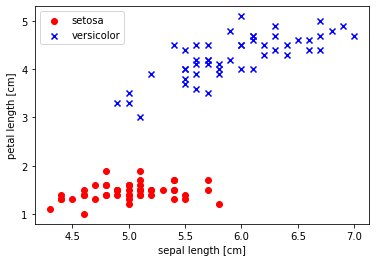

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#  this will print the dataset
# print(df)
# select setosa and versicolor
# this will get the value on column 4 for rows 0-100 
y = df.iloc[0:100, 4].values
# print(y)
# this will set y = -1 if the value is Iris-setosa
# or ro 1 if it is not
y = np.where(y == 'Iris-setosa', -1, 1)
# print(y)
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
# print(X)
# plot data
# this plots the X array
# for elements 0-50 ( Iris-Setosa) 
# value for column 0 (sepal length)
# and value for column 1 (petal length) 
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
# this does the same as above but for array elements 50-100 Iris-Versicolor
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
# add labels
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# place the legend in the upper left
plt.legend(loc='upper left')
plt.show()

Since a straight line can be drawn through the graph a linear classifier like perceptron will work

The following code trains the algorithm
The  perceptron converged after the sixth epoch and should now be able to classify the training examples

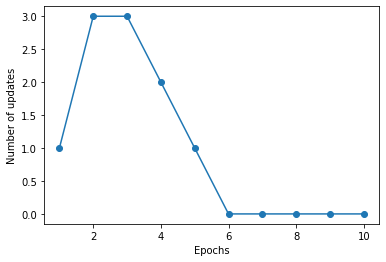

In [5]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

#### Define a function to display the decision boundaries

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    # determine the minimum and maximum values
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # create 2 grid arrays
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # flatten the grid arrays
    Z = Z.reshape(xx1.shape)
    # draw a contour plot
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

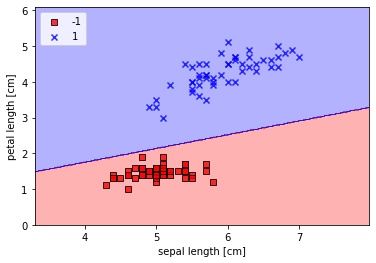

In [7]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Perceptron convergence
- perceptron classified the two Iris flower classes easily 
- However, convergence is one of the biggest problems of the perceptron. 
- if the classes cannot be separated perfectly by such a linear decision boundary, the weights will never stop updating unless the maximum number of epochs is set

## Adaptive linear neurons and the convergence of learning

- There is another type of single-layer neural network (NN):
     - **ADA**ptive **LI**near **NE**uron  or Adaline
- It can be considered an improvement on the perceptron algorithm
- It illustrates the key concepts of defining and minimizing continuous cost functions which lays the groundwork for understanding more advanced machine learning algorithms for classification
     - logistic regression
     - support vector machines
     - regression models

The key difference between the Adaline rule and perceptron is that the weights are updated based on a linear activation function rather than a unit step function like in the perceptron.
- In Adaline, this linear activation function
    - 𝜙(𝑧) , is simply the identity function of the net input
    - represented by
        - 𝜙($𝒘^𝑇𝒙$) = $𝒘^𝑇$

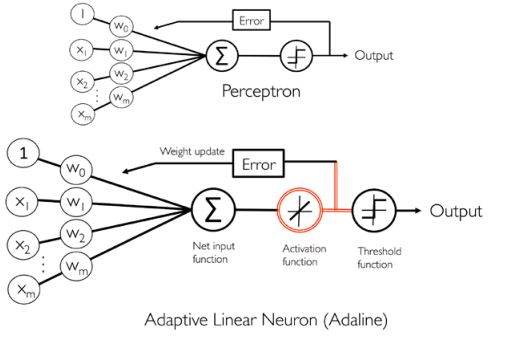

## Minimizing cost functions with gradient descent
- One of the key ingredients of supervised machine learning algorithms is a defined objective function that is to be optimized during the learning process. 
-  This objective function is often a cost function that we want to minimize. 
- In the case of Adaline, we can define the cost function, J, to learn the weights as the sum of squared errors (SSE) between the calculated outcome and the true class label:
$$j(w) = \frac{1}{2} \sum_{i}(y^{(i)} - \phi$$

$$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

Stopped at page 37, Gradient Descent is covered in the Udemy ML notebook